### Analyzing the risk of tech stocks

In this project, I will analyze the risk of different tech stocks.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

In [3]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX','META']
end = datetime.now()
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,163.631315,166.783506,161.286454,164.049004,164.049004,3.279179e+07
std,38.246702,38.576323,37.988023,38.362330,38.362330,2.188171e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,1.200760e+07
25%,132.909996,136.885002,131.579994,133.339996,133.339996,2.192790e+07
50%,164.800003,167.759995,161.300003,163.729996,163.729996,2.737450e+07
75%,187.055000,193.305000,183.844994,186.294998,186.294998,3.536275e+07
max,247.470001,253.570007,246.649994,249.210007,249.210007,2.323166e+08


In [5]:
META.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-25 to 2023-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Change in Stock Price Over Time

<Axes: xlabel='Date'>

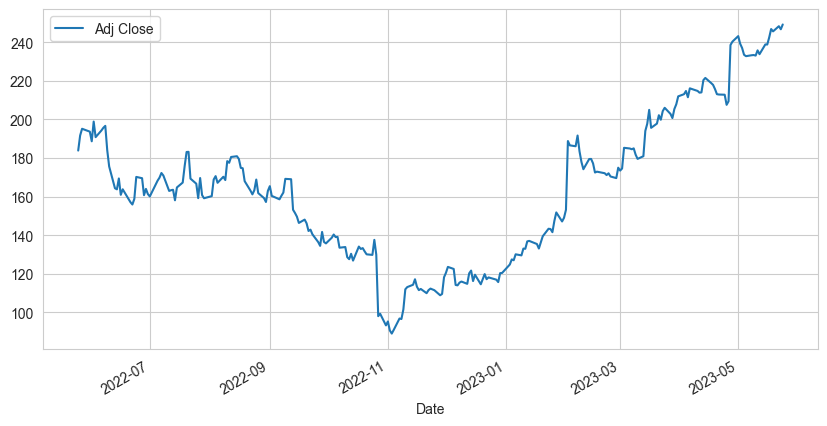

In [6]:
META['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

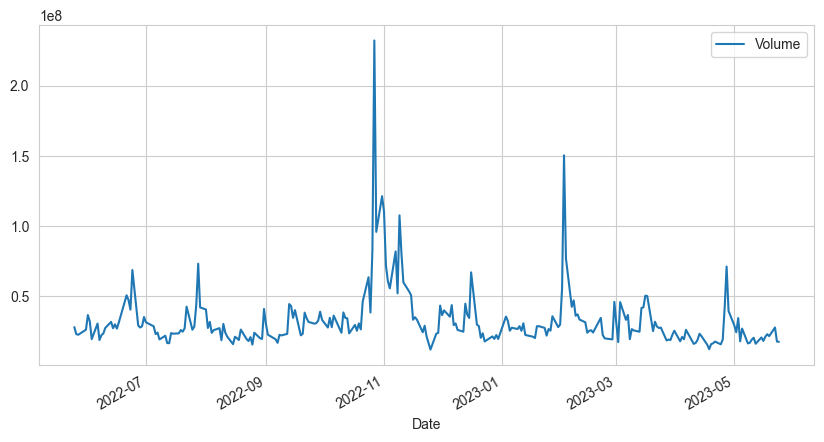

In [7]:
META['Volume'].plot(legend = True, figsize = (10,5))

Despite what's been happening with META, stock prices are higher but the volume is lower. This means that the stock price is being driven up by a few large investors. This is a risky situation because if those investors decide to sell, the stock price will drop quickly.

<Axes: xlabel='Date'>

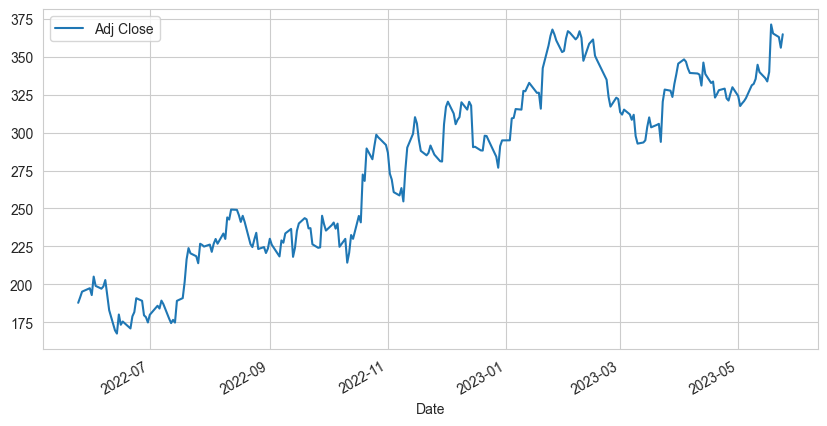

In [8]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

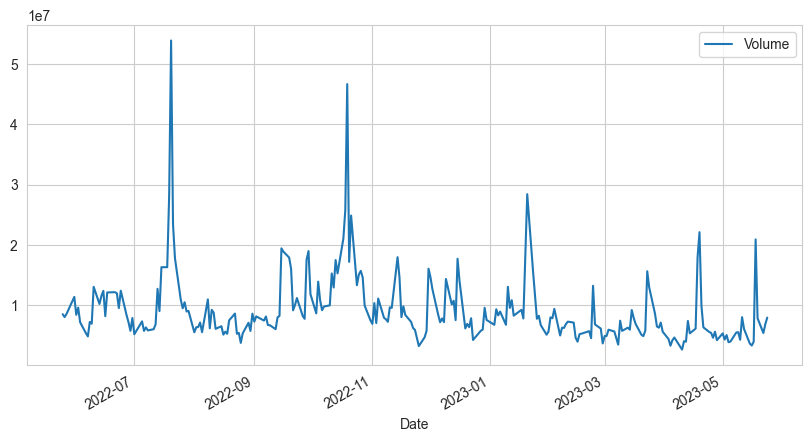

In [9]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

Netflix seems to be doing well and has high volumes of stocks being traded. This means that the stock price is being driven up by many investors. This is a good situation because if some investors decide to sell, the stock price will not drop quickly. 

<Axes: xlabel='Date'>

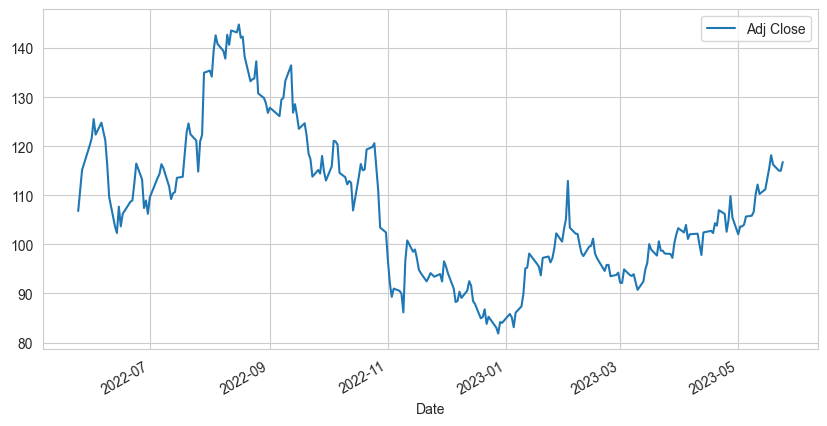

In [10]:
AMZN['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

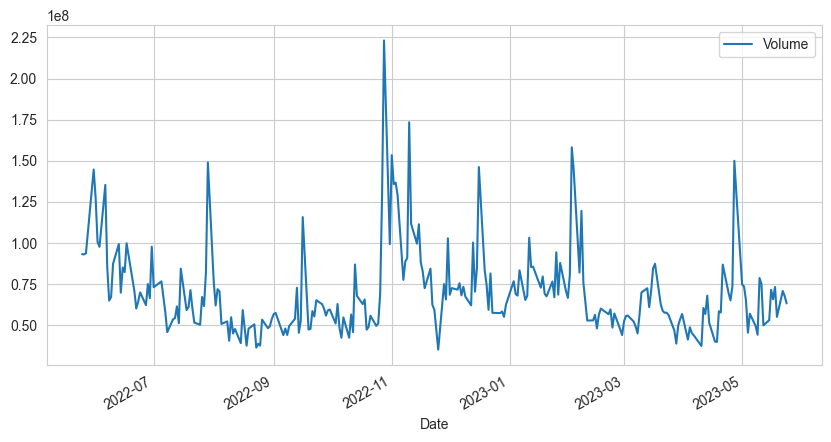

In [11]:
AMZN['Volume'].plot(legend = True, figsize = (10,5))

Amazons stock is slowly climbing up but the volume being traded is rising. This means that the stock price is being driven up by many investors. 

<Axes: xlabel='Date'>

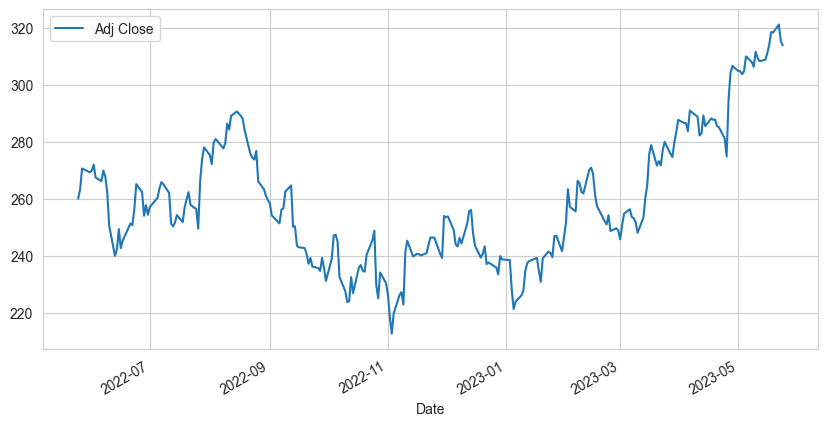

In [12]:
MSFT['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

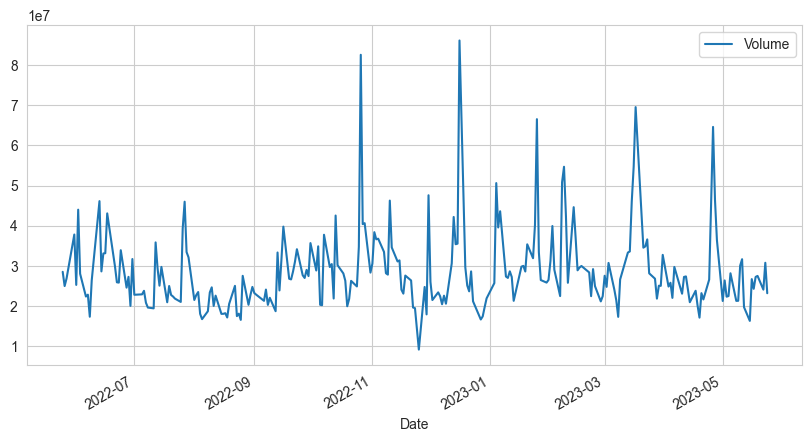

In [13]:
MSFT['Volume'].plot(legend = True, figsize = (10,5))

Microsoft is doing well. Both stock and volumes being traded are high. 

<Axes: xlabel='Date'>

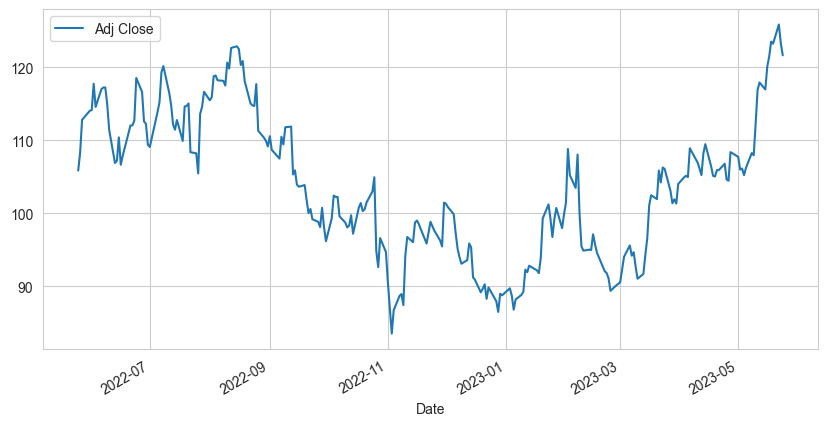

In [14]:
GOOG['Adj Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

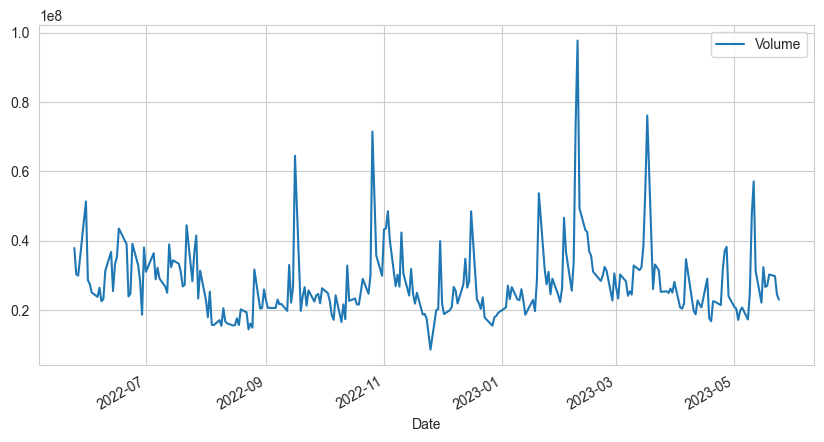

In [15]:
GOOG['Volume'].plot(legend = True, figsize = (10,5))

Google stocks are high but volume trades are decreasing. 

<Axes: xlabel='Date'>

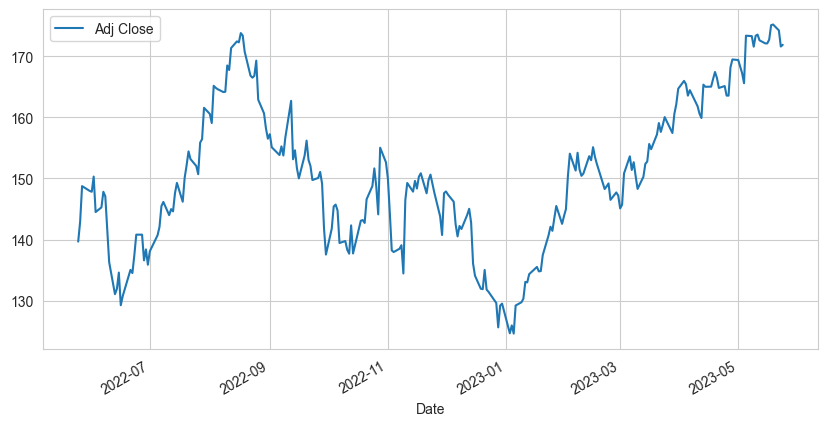

In [16]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

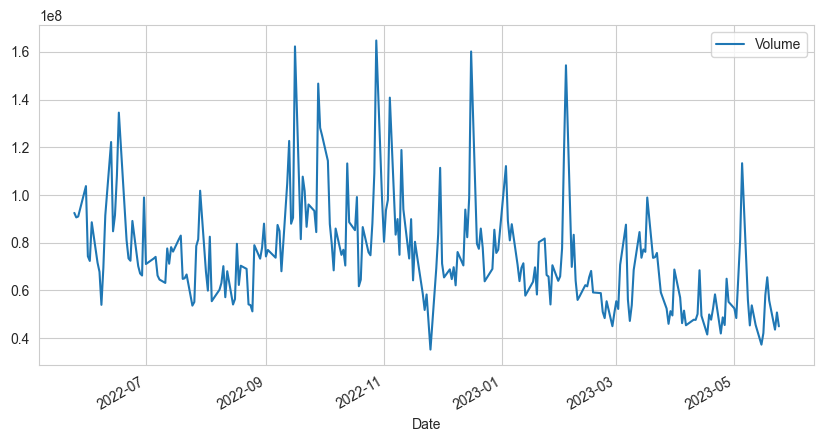

In [17]:
AAPL['Volume'].plot(legend = True, figsize = (10,5))

Apples prices are high and volume trades are high. It has the most fluctuations in volume out of the 5 FAANG stocks. 

### Calculating Moving Average

In [18]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,347.250000,375.869995,346.369995,371.290009,371.290009,20925200,338.707007,331.152802,326.539801,294.926751
2023-05-19,369.859985,369.989990,363.809998,365.359985,365.359985,7850900,342.967004,332.222001,327.891401,295.619901
2023-05-22,365.359985,372.010010,362.500000,363.010010,363.010010,5406400,346.147006,333.433601,329.296401,296.285401
2023-05-23,360.239990,364.170013,354.309998,355.989990,355.989990,6866100,348.532004,334.325200,330.546000,296.931451
2023-05-24,356.929993,367.149994,356.630005,364.850006,364.850006,7962300,351.475003,335.994401,331.944200,297.588251


<Axes: xlabel='Date'>

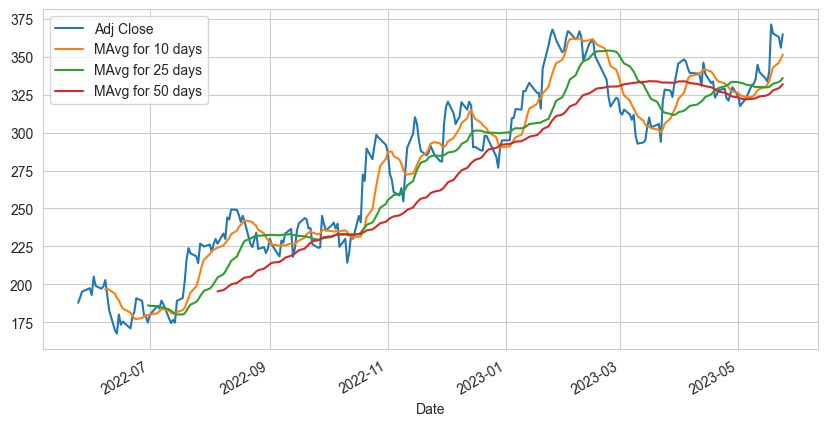

In [19]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days',]].plot(subplots = False, figsize = (10,5))

From the 50 day moving average, there seems to be a negative trend on the stock. Theres a chance of it potentially dropping.

In [20]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    META[label] = META['Adj Close'].rolling(window = avg, center = False).mean()
META.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,241.300003,247.089996,241.190002,246.850006,246.850006,22943300,236.912001,229.224401,216.441200,160.55670
2023-05-19,247.470001,248.690002,243.410004,245.639999,245.639999,21599800,238.198001,230.190400,217.720200,160.94090
2023-05-22,245.410004,253.570007,245.119995,248.320007,248.320007,27738500,239.703001,231.368801,219.096400,161.32965
2023-05-23,246.809998,251.610001,246.649994,246.740005,246.740005,17748100,241.040002,232.522801,220.413201,161.72780
2023-05-24,245.279999,249.589996,244.949997,249.210007,249.210007,17552900,242.653003,233.863201,221.517001,162.12260


<Axes: xlabel='Date'>

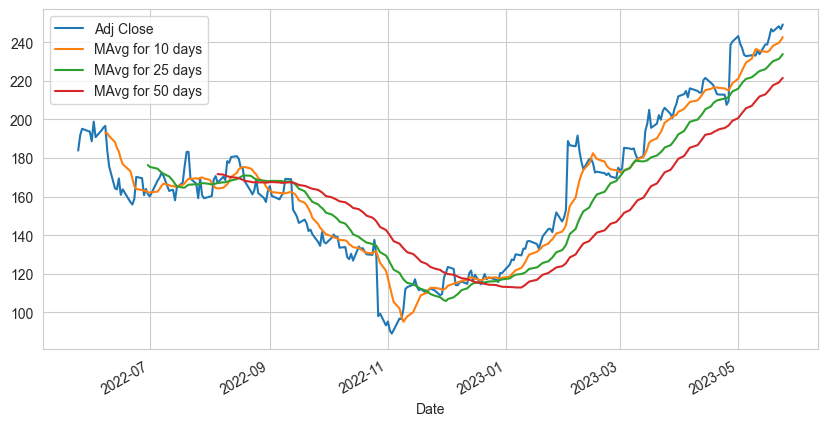

In [21]:
META[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

Metas stock is rising but its still staying constant looking at the 200 day average. It seems to be increasing slowly so its trending upwards.

In [22]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    AMZN[label] = AMZN['Adj Close'].rolling(window = avg, center = False).mean()
AMZN.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,110.899001,106.958801,102.9194,105.89120
2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,111.958001,107.508401,103.3994,105.77485
2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70741100,112.876001,107.999201,103.8850,105.63705
2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,113.713000,108.506801,104.3362,105.50800
2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63191700,114.369000,109.004800,104.7736,105.39470


<Axes: xlabel='Date'>

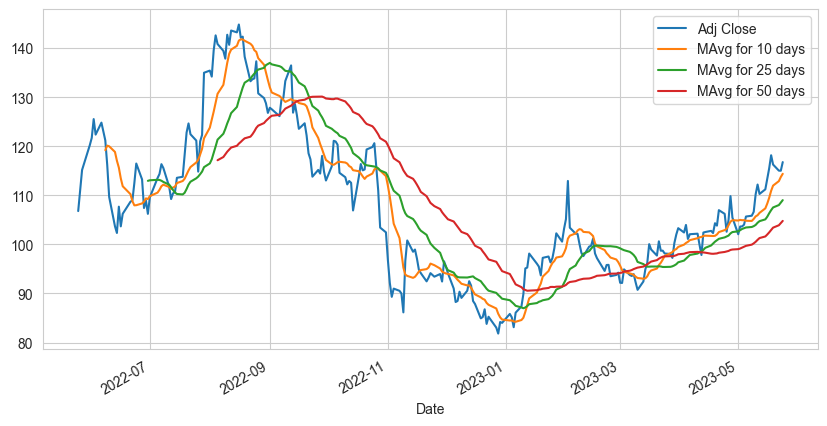

In [23]:
AMZN[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

Amazons stock is staying pretty consistent throughout the changes but it is slowly decreasing. Long term, may not be worth staying but for short term, could be worth investigating.

In [24]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    AAPL[label] = AAPL['Adj Close'].rolling(window = avg, center = False).mean()
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700,172.940366,168.979300,163.826912,151.657343
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400,173.123340,169.386428,164.322472,151.707424
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900,173.217305,169.754357,164.840575,151.754295
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,173.220030,169.967154,165.266531,151.789110
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,44941700,173.072003,170.144815,165.655747,151.827715


<Axes: xlabel='Date'>

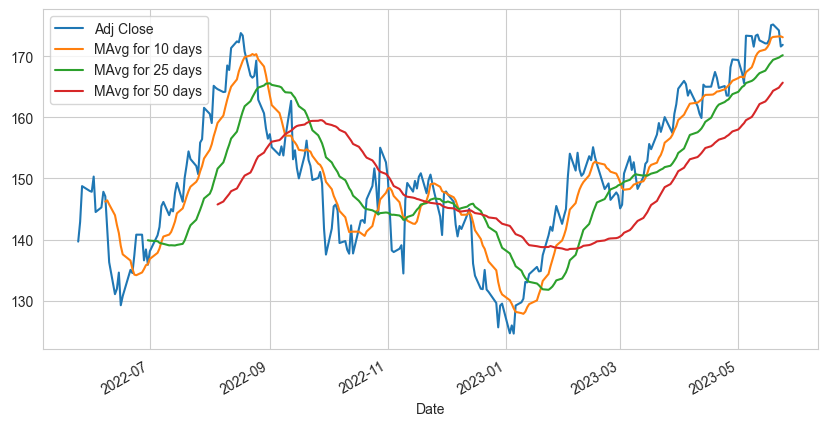

In [25]:
AAPL[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

Apple is doing well. Based on the 10 day moving average, its on a bullish trend for short term but the overall trend is still negative.

In [26]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    MSFT[label] = MSFT['Adj Close'].rolling(window = avg, center = False).mean()
MSFT.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,310.600278,300.217815,288.079096,257.994335
2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,311.437039,301.530780,289.410503,258.187206
2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,312.757364,302.851178,290.873148,258.388434
2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,313.650330,303.951940,292.111026,258.563727
2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23219600,313.872455,304.993107,293.183603,258.744795


<Axes: xlabel='Date'>

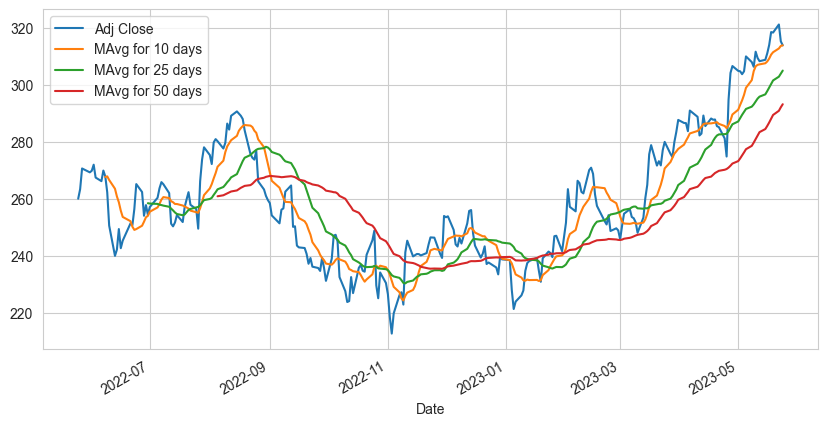

In [27]:
MSFT[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

Short term bull signal for Microsoft. Long term, its on a bearish trend.

In [28]:
averages = [10,25,50,200]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    GOOG[label] = GOOG['Adj Close'].rolling(window = avg, center = False).mean()
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days
Date,,,,,,,,,,
2023-05-18,121.559998,123.900002,121.489998,123.519997,123.519997,27014500,115.154499,109.8730,106.0559,101.223875
2023-05-19,124.199997,126.478996,122.720001,123.250000,123.250000,30251300,116.857999,110.4246,106.6677,101.246225
2023-05-22,123.510002,127.050003,123.449997,125.870003,125.870003,29760200,118.621000,111.2026,107.3649,101.281225
2023-05-23,124.930000,125.419998,123.050003,123.290001,123.290001,24477900,120.156000,111.9294,107.9975,101.306575
2023-05-24,121.879997,122.750000,120.750000,121.639999,121.639999,22973900,121.092000,112.5942,108.5453,101.324075


<Axes: xlabel='Date'>

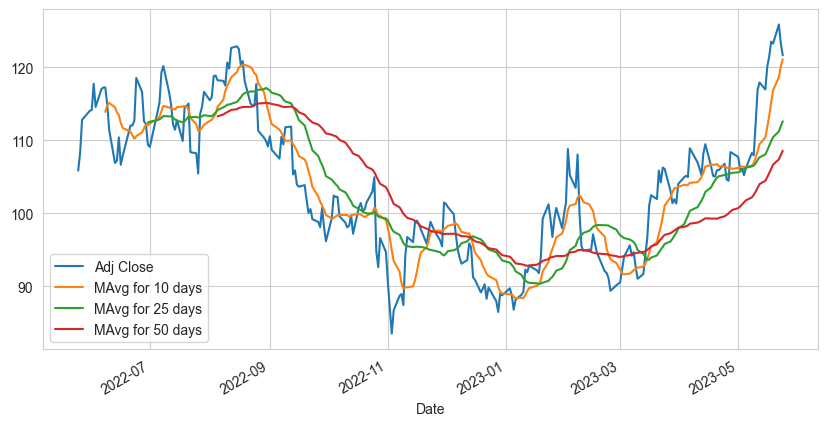

In [29]:
GOOG[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

Another stock that has a bullish short term trend but a bearish long term trend.

### Daily Return Averages

In [30]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,347.250000,375.869995,346.369995,371.290009,371.290009,20925200,338.707007,331.152802,326.539801,294.926751,0.092158
2023-05-19,369.859985,369.989990,363.809998,365.359985,365.359985,7850900,342.967004,332.222001,327.891401,295.619901,-0.015971
2023-05-22,365.359985,372.010010,362.500000,363.010010,363.010010,5406400,346.147006,333.433601,329.296401,296.285401,-0.006432
2023-05-23,360.239990,364.170013,354.309998,355.989990,355.989990,6866100,348.532004,334.325200,330.546000,296.931451,-0.019338
2023-05-24,356.929993,367.149994,356.630005,364.850006,364.850006,7962300,351.475003,335.994401,331.944200,297.588251,0.024888


<Axes: xlabel='Date'>

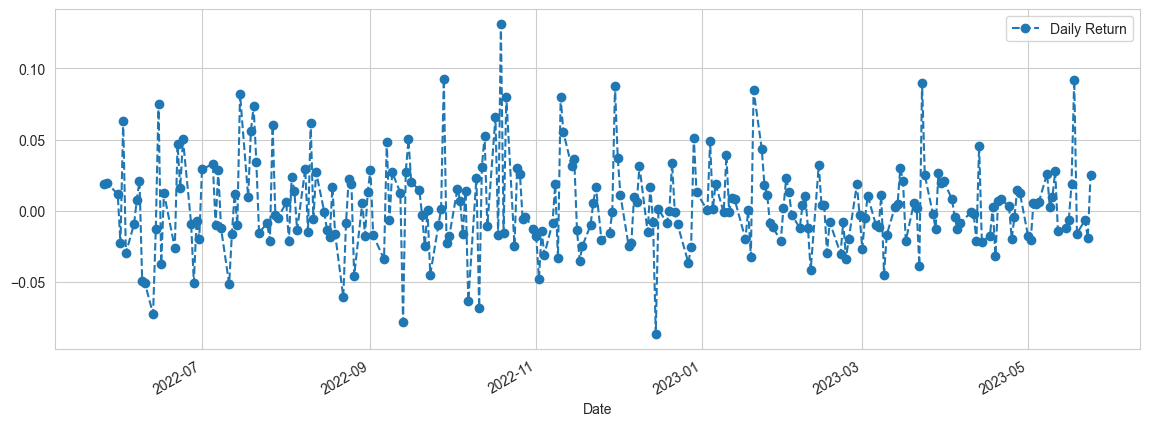

In [31]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

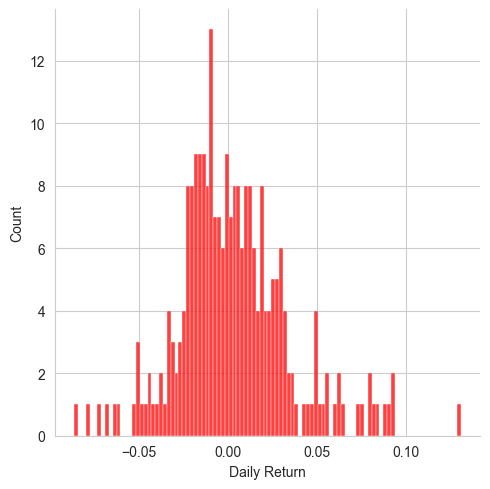

In [32]:
sns.displot(NFLX['Daily Return'].dropna(),bins=100,color='red')

We see the potential return being skewed towards negative returns.

In [33]:
META['Daily Return'] = META['Adj Close'].pct_change()
META.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,241.300003,247.089996,241.190002,246.850006,246.850006,22943300,236.912001,229.224401,216.441200,160.55670,0.017980
2023-05-19,247.470001,248.690002,243.410004,245.639999,245.639999,21599800,238.198001,230.190400,217.720200,160.94090,-0.004902
2023-05-22,245.410004,253.570007,245.119995,248.320007,248.320007,27738500,239.703001,231.368801,219.096400,161.32965,0.010910
2023-05-23,246.809998,251.610001,246.649994,246.740005,246.740005,17748100,241.040002,232.522801,220.413201,161.72780,-0.006363
2023-05-24,245.279999,249.589996,244.949997,249.210007,249.210007,17552900,242.653003,233.863201,221.517001,162.12260,0.010011


<Axes: xlabel='Date'>

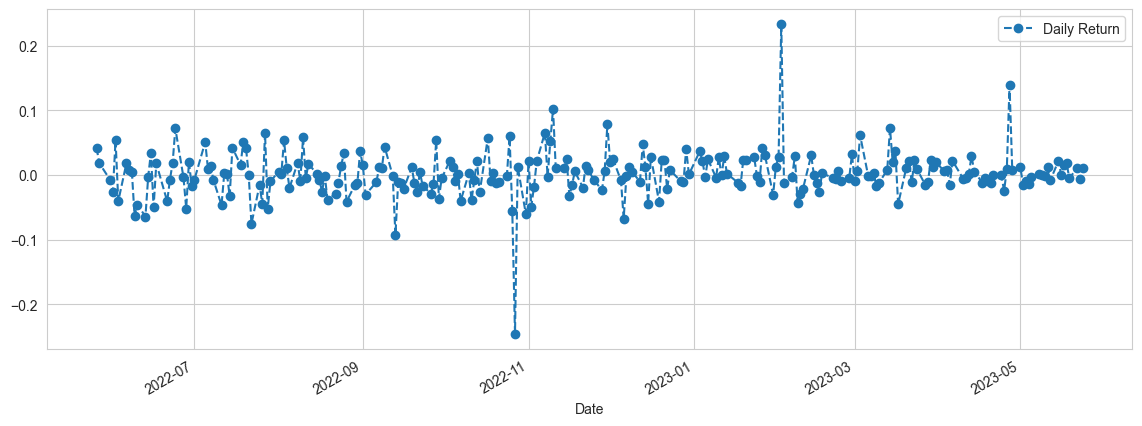

In [34]:
META['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

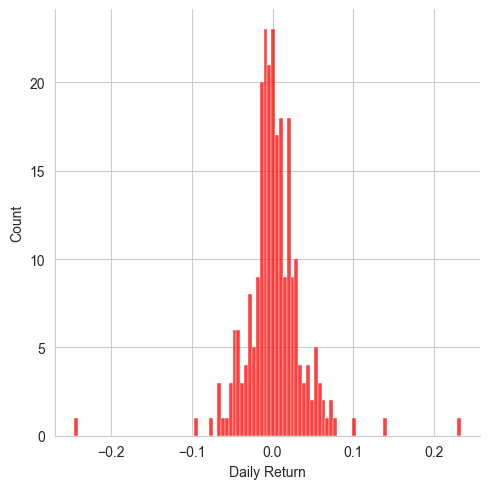

In [35]:
sns.displot(META['Daily Return'].dropna(),bins=100,color='red')

The returns are close to 0 but slighly negative.

In [36]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,310.600278,300.217815,288.079096,257.994335,0.014395
2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,311.437039,301.530780,289.410503,258.187206,-0.000565
2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,312.757364,302.851178,290.873148,258.388434,0.008921
2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,313.650330,303.951940,292.111026,258.563727,-0.018432
2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23219600,313.872455,304.993107,293.183603,258.744795,-0.004473


<Axes: xlabel='Date'>

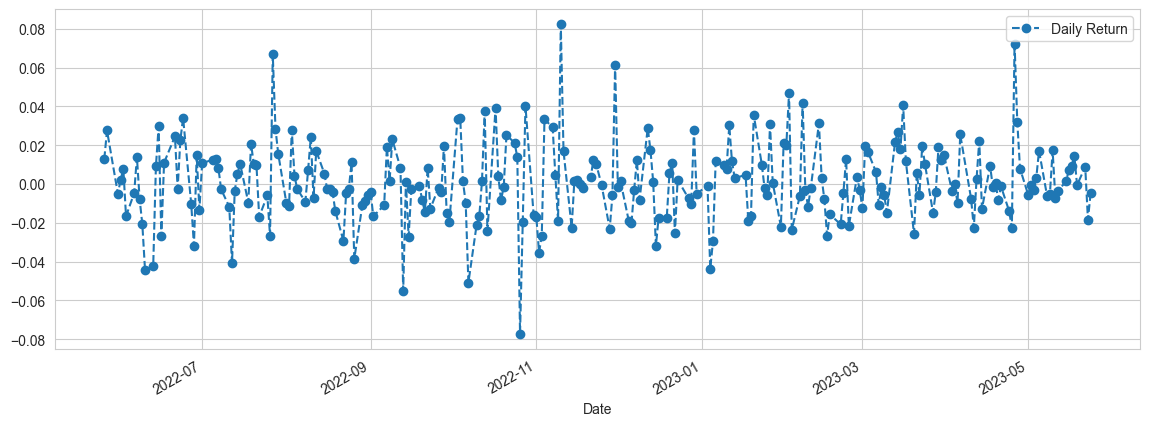

In [37]:
MSFT['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

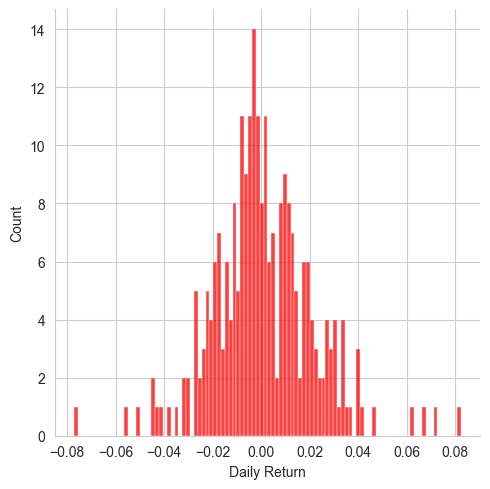

In [38]:
sns.displot(MSFT['Daily Return'].dropna(),bins=100,color='red')

We find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns

In [39]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,121.559998,123.900002,121.489998,123.519997,123.519997,27014500,115.154499,109.8730,106.0559,101.223875,0.016793
2023-05-19,124.199997,126.478996,122.720001,123.250000,123.250000,30251300,116.857999,110.4246,106.6677,101.246225,-0.002186
2023-05-22,123.510002,127.050003,123.449997,125.870003,125.870003,29760200,118.621000,111.2026,107.3649,101.281225,0.021258
2023-05-23,124.930000,125.419998,123.050003,123.290001,123.290001,24477900,120.156000,111.9294,107.9975,101.306575,-0.020497
2023-05-24,121.879997,122.750000,120.750000,121.639999,121.639999,22973900,121.092000,112.5942,108.5453,101.324075,-0.013383


<Axes: xlabel='Date'>

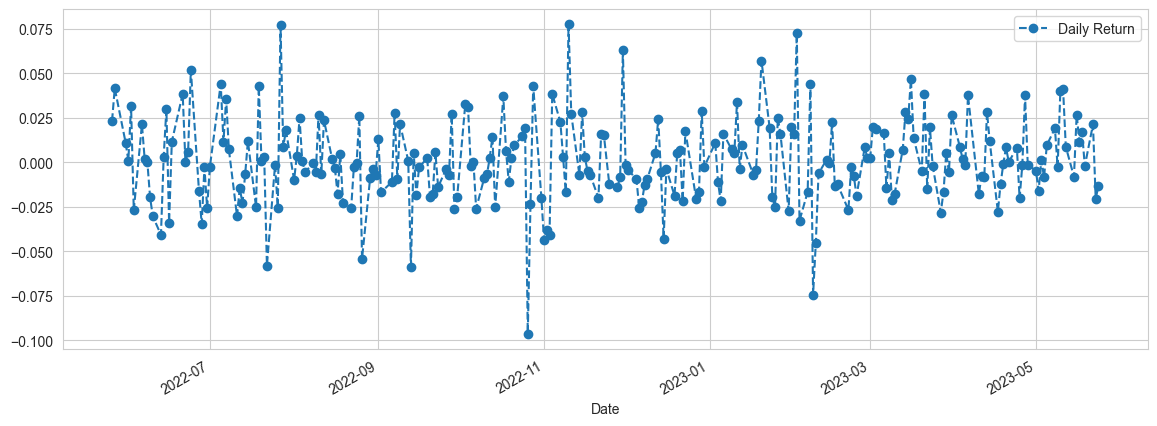

In [40]:
GOOG['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

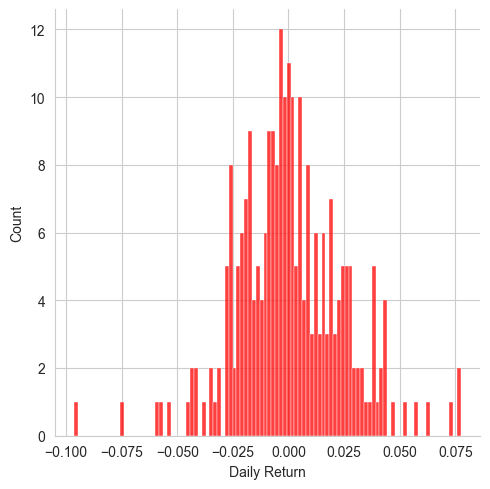

In [41]:
sns.displot(GOOG['Daily Return'].dropna(),bins=100,color='red')

We find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns

In [42]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700,172.940366,168.979300,163.826912,151.657343,0.013666
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400,173.123340,169.386428,164.322472,151.707424,0.000628
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900,173.217305,169.754357,164.840575,151.754295,-0.005481
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,173.220030,169.967154,165.266531,151.789110,-0.015155
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,44941700,173.072003,170.144815,165.655747,151.827715,0.001632


<Axes: xlabel='Date'>

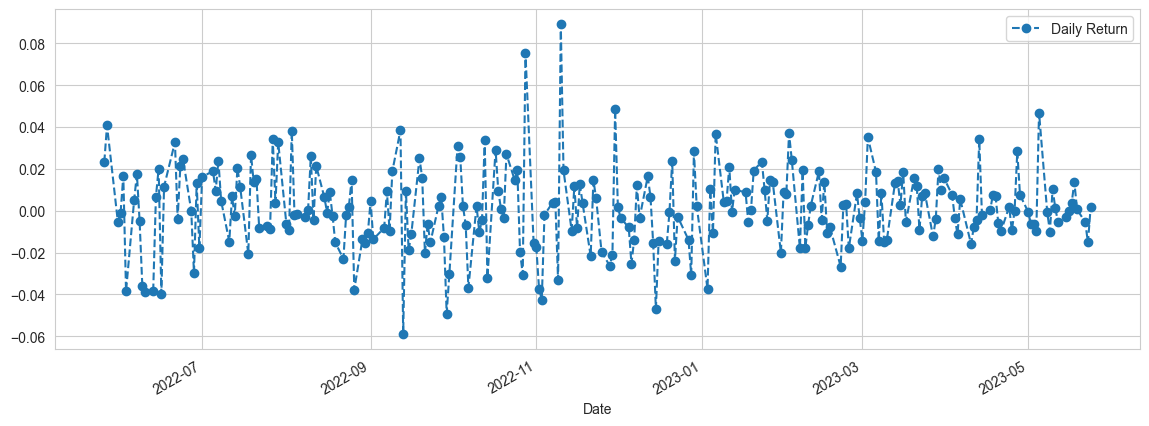

In [43]:
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

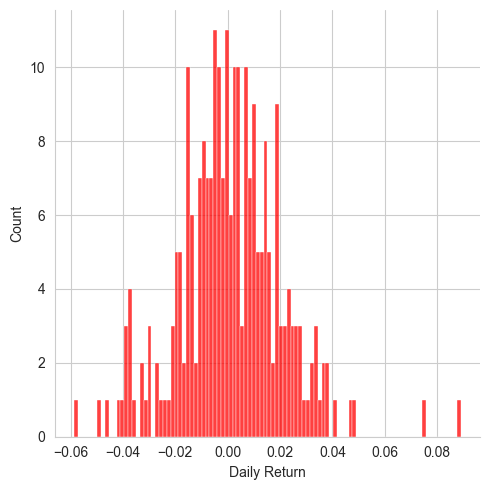

In [44]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='red')

Apples returns are close to 0 but slightly negative.

In [45]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,MAvg for 200 days,Daily Return
Date,,,,,,,,,,,
2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,110.899001,106.958801,102.9194,105.89120,0.022944
2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,111.958001,107.508401,103.3994,105.77485,-0.016081
2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70741100,112.876001,107.999201,103.8850,105.63705,-0.010667
2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,113.713000,108.506801,104.3362,105.50800,-0.000174
2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63191700,114.369000,109.004800,104.7736,105.39470,0.015306


<Axes: xlabel='Date'>

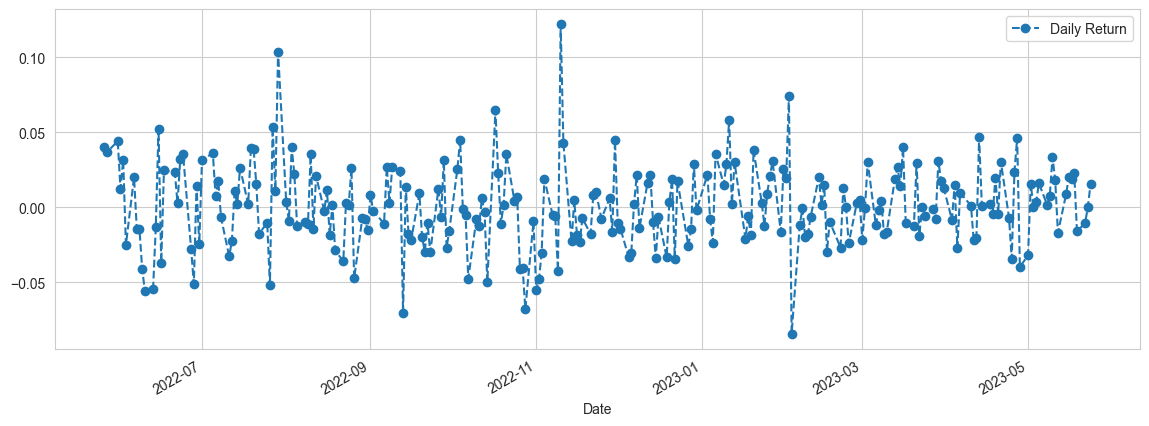

In [46]:
AMZN['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

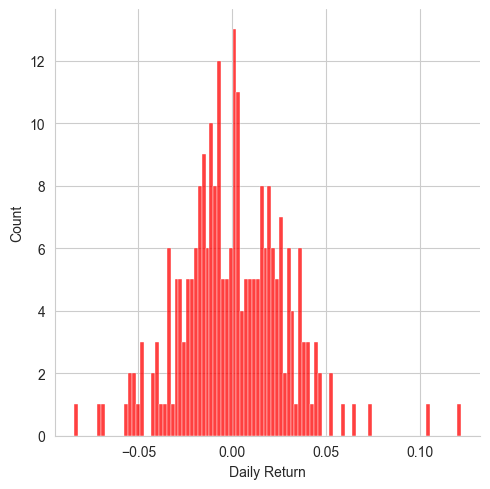

In [47]:
sns.displot(AMZN['Daily Return'].dropna(),bins=100,color='red')

Amazons returns are close to 0 but slightly negative.

### Determining Value from Risk vs. Expected Return

In [51]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2023-05-18,0.013666,0.022944,0.016793,0.017980,0.014395,0.092158
2023-05-19,0.000628,-0.016081,-0.002186,-0.004902,-0.000565,-0.015971
2023-05-22,-0.005481,-0.010667,0.021258,0.010910,0.008921,-0.006432
2023-05-23,-0.015155,-0.000174,-0.020497,-0.006363,-0.018432,-0.019338
2023-05-24,0.001632,0.015306,-0.013383,0.010011,-0.004473,0.024888


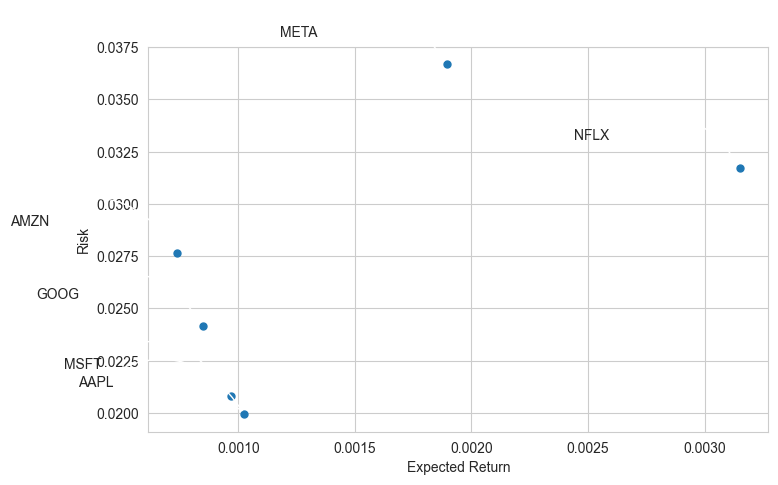

In [54]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

From this plot, we can see both META and Netflix are the riskiest stocks. This is because they have the highest standard deviation but they also have the highest expected return. Apple is the safest.